
0: 448x448 91 circles, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 448)


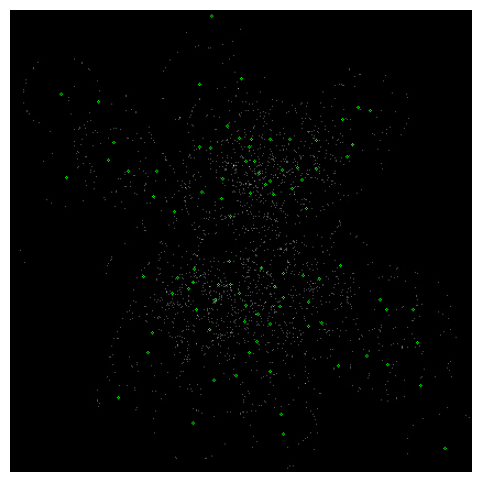

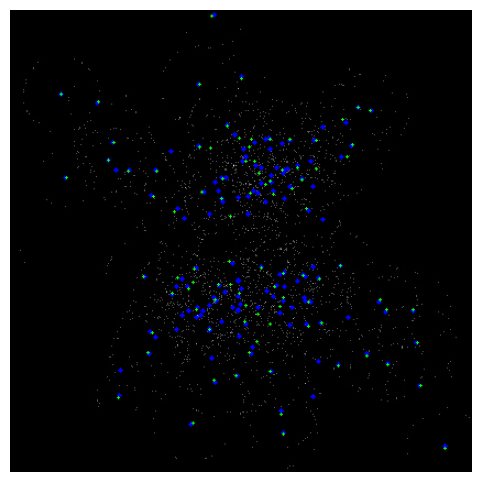

Number of predicted keypoints: 91
Number of ground truth keypoints: 147


([0.5604395604395604, 0.8241758241758241, 0.9010989010989011],
 [0.3469387755102041, 0.5102040816326531, 0.5578231292517006],
 [0.4285714285714286, 0.6302521008403361, 0.6890756302521008])

In [3]:
import sys

sys.path.append(r'/user/gr1/delphi/dghezzi/KeyPoint_Detection')

import KP as kpl
import numpy as np

image_path = r'/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/Prova420.jpg'
txt_path = r'/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/Prova420.txt'
model_path = '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/training_output/weights/epoch21.pt'

results = kpl.inference(image_path, model_path, confidence=0.4, show_image=True, save_image=False)
kpl.show_with_MCpoints(results, image_path, txt_path, show_image=True, save_image=False, img_size=(420, 420))

pred_points = kpl.keypoints_from_result(results[0])
gt_points = kpl.keypoints_from_txt(txt_path, img_size=(420, 420))
print(f'Number of predicted keypoints: {len(pred_points)}')
print(f'Number of ground truth keypoints: {len(gt_points)}')

kpl.compute_pck_metrics(pred_points, gt_points, thresholds=[2,4,6])

Epoch9 ==> @4px: p=0.811, r=0.497, f1=0.616 (conf=0.4, 90 centri) --- nota: è il migliore in pose (OKS)

Epoch14 ==> @4px: p=0.862, r=0.510, f1=0.641 (conf=0.4, 87 centri)

Epoch21 ==> @4px: p=0.824, r=0.510, f1=0.630 (conf=0.4, 91 centri)

Last (~60 epoche) ==> @4px: p=0.885, r=0.524 f1=0.658 (conf=0.4, 87 centri)

In [ ]:
from KP import inference_F1map
model_path = '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/training_output/weights/last.pt'
images_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/420px/images/val'
txt_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/420px/labels/val'

f1_matrix = inference_F1map(images_path, txt_path, model_path, thresholds=[2, 4, 6], conf_thresholds=np.arange(0.3, 0.6, 0.03), img_size=420)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/user/gr1/delphi/dghezzi/.venv/lib64/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2503720/2497859037.py", line 6, in <module>
    f1_matrix = inference_F1map(images_path, txt_path, model_path, thresholds=[2, 4, 6], conf_thresholds=np.arange(0.3, 0.6, 0.03))
  File "/user/gr1/delphi/dghezzi/KeyPoint_Detection/KP.py", line 342, in inference_F1map
  File "/user/gr1/delphi/dghezzi/KeyPoint_Detection/KP.py", line 167, in compute_pck_metrics
    dists = np.linalg.norm(pred_points[:, None, :] - gt_points[None, :, :], axis=2)
  File "<__array_function__ internals>", line 180, in norm
  File "/user/gr1/delphi/dghezzi/.venv/lib64/python3.9/site-packages/numpy/linalg/linalg.py", line 2557, in norm
    return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
KeyboardInterrupt

During handling of the above exception, another exception occurred:

In [ ]:
from KP import inference_setImages

thresholds = [4]

stats = inference_setImages(images_path, txt_path, model_path, thresholds=thresholds, img_size=420)